In [1]:
# Import data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Spotify\ ML\ Project

/content/drive/MyDrive/Spotify ML Project


### Import Libraries 

In [3]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

import warnings
warnings.filterwarnings(action="ignore")

In [4]:
# Import merged dataset - Spotify
Spotify = pd.read_csv('merged_all_df.csv')
Spotify = Spotify.drop(['Unnamed: 0'], axis=1)
Spotify.head()

track_id  popularity  acousticness  danceability  \
0  3VAX2MJdmdqARLSU5hPMpm          31          0.86          0.72   
1  01zME4q62SDPtD0hOSmTrG          47          0.10          0.75   
2  2Dh5wED4UVeiBqneUdc5Gy          35          0.19          0.61   
3  2hX9xFhvz0LTYJ7KvcENMl           7          0.68          0.68   
4  58QDB1sKe1wHZEvngevtGE          55          0.08          0.47   

   disc_number  duration_ms  energy  instrumentalness  key  liveness  ...  \
0            1     2.154012    0.31              0.00    6      0.25  ...   
1            1    -0.047806    0.67              0.00    6      0.10  ...   
2            1    -0.016299    0.66              0.04    5      0.12  ...   
3            1     1.789076    0.25              0.00    7      0.18  ...   
4            1    -0.468785    0.83              0.00    9      0.18  ...   

   album_type_compilation  album_type_single  type_album  \
0                     0.0                0.0         1.0   
1                     0.0                1.0         1.0   
2                     0.0                1.0         1.0   
3                     0.0                0.0         1.0   
4                     0.0                1.0         1.0   

   release_date_precision_day  release_date_precision_month  \
0                         1.0                           0.0   
1                         1.0                           0.0   
2                         1.0                           0.0   
3                         1.0                           0.0   
4                         1.0                           0.0   

   release_date_precision_year  year  month  day  weekday  
0                          0.0  2011      3    1        1  
1                          0.0  2018      9    7        4  
2                          0.0  2018      6   22        4  
3                          0.0  2010      2    1        0  
4                          0.0  2018     12   21        4  

[5 rows x 317 columns]

In [5]:
# Drop duplicates
Spotify = Spotify.drop_duplicates(subset = ['track_id'])

# Transforming target variable
# Define custom bin edges based on specified value ranges


# Bin the 'values' column using pd.cut() and custom bin edges
# Divide into bins
Spotify['pop_bins'] = pd.qcut(x=Spotify['popularity'], q=5, labels=[1, 2, 3, 4, 5])

Spotify['pop_bins'].value_counts()

mean_popularity = Spotify.popularity.mean()

print(mean_popularity)

Spotify[['pop_bins']].value_counts()

37.981694176111155


pop_bins
1           8393
3           8093
2           7715
4           7669
5           7571
dtype: int64

In [6]:
i = Spotify[['track_id', 'popularity']].groupby('track_id').count()

i.sort_values('popularity', ascending = False).reset_index()

track_id  popularity
0      002F8HWG4UVMxby4Z2aOFI           1
1      59tXmz8iGuxKzppJ9h0Ubv           1
2      59rk8rcGKiamC7rU5N7tg1           1
3      59s7BmfABB5JPiQzTRtuPc           1
4      59sHDRD5oCYDdSlx7ivFX6           1
...                       ...         ...
39436  2bnDyT1o8Mcasd203svcbt           1
39437  2bnMut60wd1FLcCgnAueWd           1
39438  2boA136DxbE2NiZXxrE5O8           1
39439  2bpmisazTQ49QpLMGZGp1X           1
39440  7zzpno7uAqkAzWZDQuGEFA           1

[39441 rows x 2 columns]

# EDA

In [7]:
# Import all datasets
spotify_artists = pd.read_csv('spotify_artists.csv')

In [8]:
!pip install unidecode


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from unidecode import unidecode
import re

# Get rid of special characters and transform Texto column to Latin words
Spotify['name'] = Spotify['name'].apply(lambda x: unidecode(x))

#The re.sub function is used to substitute all digits (\d) with an empty string
Spotify['name'] = Spotify['name'].apply(lambda x: re.sub(r'\d', '', x))

In [10]:
# Create an empty list to store the text
text_list = []

# Loop through the 'text' column
for text in Spotify['name'].str.lower(): # Transform every word to lower case
    text_list.append(text)

# Print the list of text
print(text_list)

['storytime classics, vol. ', 'creature kind', 'cola falls', 'charles dickens - the short stories', 'donde estas', 'bram stoker - the short stories', 'te metiste', 'soltera', "jesus i'm a sinner", 'alma gemea', 'luis "vivi" hernandez, vol. ', 'rockstar', 'stay a little longer', 'ocean (feat. alexandra stan) [radio edit]', 'eradicate', 'nothing changes', 'vivir muriendo', 'get on down', 'jaane bhi de', 'wait', 'la huesuda', 'side a', 'passion', 'dia de los muertos (con mariachi)', 'deep inside', 'greatest hits: dance', 'tu jeva', 'cuando me muera', "richard sen presents this ain't chicago - the underground sound of uk house & acid -", 'me gusta', 'bailando', "pa' que me caliente", "run it's the kid", 'asueto', 'dynamita', '?donde estan las tias?', 'riyadh', 'no disimula', 'everything', 'hun rider pa den', 'sudo', 'zero charisma (demos)', 'over askeskyen (deluxe version)', 'fisseprutter', 'where to go', 'basken ', "les chemins d'ete", 'pollen', 'closer', 'luv', 'sleep talker', 'bubble', 

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = Spotify.name

# Download the Portuguese stop words
nltk.download('stopwords')
nltk.download('punkt')

# Get the Portuguese stop words
stop_words = set(stopwords.words('english'))

# Create a new list to store the filtered text
filtered_text = []

# Loop through the text_list and remove the stop words
for text in text_list:
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    filtered_text.append(" ".join(words))

# Save the filtered text as a new column to the dataframe
Spotify['filtered_name'] = filtered_text
Spotify[['filtered_name','name']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


filtered_name                                 name
0       storytime classics , vol .            Storytime Classics, Vol. 
1                    creature kind                        Creature Kind
2                       cola falls                           Cola Falls
3  charles dickens - short stories  Charles Dickens - The Short Stories
4                      donde estas                          Donde Estas

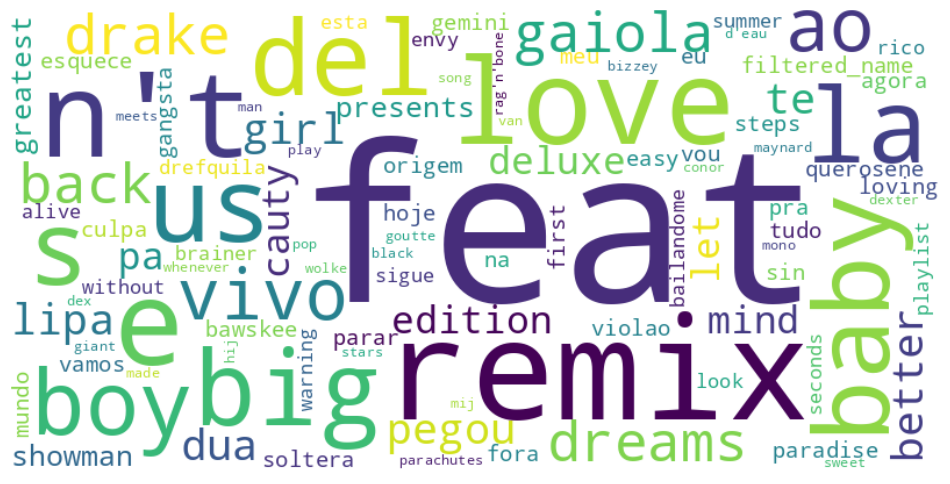

In [12]:
# Unpopular
Unpopular = Spotify[Spotify['popularity']>=80]
Unpopular_titles = Unpopular['filtered_name']

# Save the text string column to a tab-delimited text file
Unpopular['filtered_name'].to_csv('Unpopular_title.txt', sep='\t', index=False)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read song titles from a file
with open('Unpopular_title.txt', 'r') as f:
    song_titles = f.read()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(song_titles)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

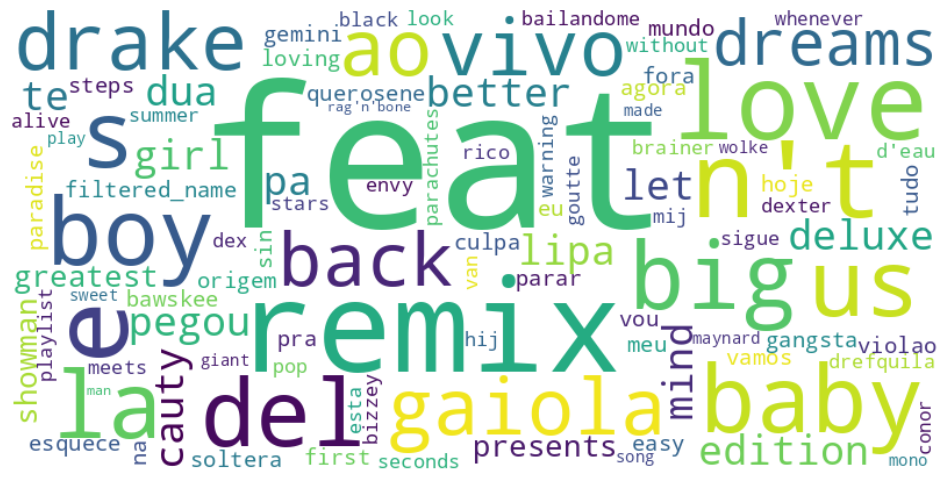

In [13]:
# Popular
Popular = Spotify[Spotify['popularity']<=80]
Popular_titles = Popular['filtered_name']

# Save the text string column to a tab-delimited text file
Popular['filtered_name'].to_csv('Popular_title.txt', sep='\t', index=False)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read song titles from a file
with open('Unpopular_title.txt', 'r') as f:
    song_titles = f.read()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(song_titles)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

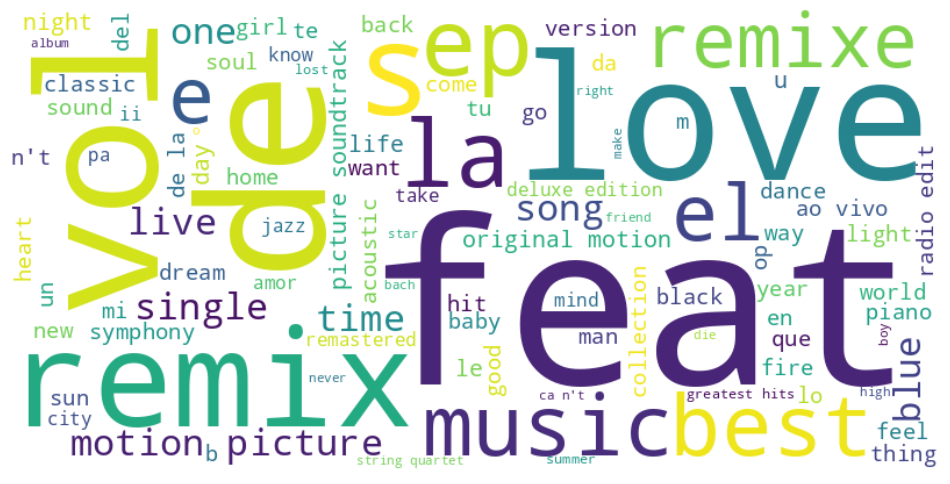

In [14]:
# Save the text string column to a tab-delimited text file
Spotify['filtered_name'].to_csv('Spotify_title.txt', sep='\t', index=False)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read song titles from a file
with open('Spotify_title.txt', 'r') as f:
    song_titles = f.read()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(song_titles)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Data Exploration: Summarize the main features of the dataset, such as the number of observations and variables, the data types, and the distribution of the data. Identify any outliers, anomalies, or unusual patterns in the data.

In [15]:
# get the number of observations and variables in the dataset
num_obs = len(Spotify.index)
num_vars = len(Spotify.columns)
print(f'Number of observations: {num_obs}')
print(f'Number of variables: {num_vars}')

# print the data types of each variable
print('Data types:')
print(Spotify.dtypes)

Number of observations: 39441
Number of variables: 319
Data types:
track_id           object
popularity          int64
acousticness      float64
danceability      float64
disc_number         int64
                   ...   
month               int64
day                 int64
weekday             int64
pop_bins         category
filtered_name      object
Length: 319, dtype: object


In [16]:
# generate summary statistics for the dataset
summary_stats = Spotify.describe()
print('Summary Statistics:')
summary_stats

Summary Statistics:


popularity  acousticness  danceability   disc_number   duration_ms  \
count  39441.000000  39441.000000   39441.00000  39441.000000  39441.000000   
mean      37.981694      0.334742       0.57890      1.014782      0.000608   
std       15.433303      0.343765       0.18516      0.208733      0.889938   
min        0.000000      0.000000       0.00000      1.000000     -1.274854   
25%       28.000000      0.030000       0.46000      1.000000     -0.323010   
50%       38.000000      0.190000       0.60000      1.000000     -0.157316   
75%       48.000000      0.630000       0.72000      1.000000      0.088175   
max       95.000000      1.000000       0.98000     14.000000     23.970709   

             energy  instrumentalness           key      liveness  \
count  39441.000000      39441.000000  39441.000000  39441.000000   
mean       0.595392          0.200879      5.278517      0.183460   
std        0.263698          0.338419      3.561227      0.156493   
min        0.000000          0.000000      0.000000      0.000000   
25%        0.420000          0.000000      2.000000      0.090000   
50%        0.640000          0.000000      5.000000      0.120000   
75%        0.810000          0.280000      8.000000      0.220000   
max        1.000000          1.000000     11.000000      1.000000   

           loudness  ...  album_type_compilation  album_type_single  \
count  39441.000000  ...            39441.000000       39441.000000   
mean      50.105981  ...                0.041606           0.525671   
std        6.094042  ...                0.199691           0.499347   
min        2.000000  ...                0.000000           0.000000   
25%       49.000000  ...                0.000000           0.000000   
50%       52.000000  ...                0.000000           1.000000   
75%       54.000000  ...                0.000000           1.000000   
max       61.000000  ...                1.000000           1.000000   

       type_album  release_date_precision_day  release_date_precision_month  \
count     39441.0                39441.000000                  39441.000000   
mean          1.0                    0.927943                      0.000203   
std           0.0                    0.258586                      0.014241   
min           1.0                    0.000000                      0.000000   
25%           1.0                    1.000000                      0.000000   
50%           1.0                    1.000000                      0.000000   
75%           1.0                    1.000000                      0.000000   
max           1.0                    1.000000                      1.000000   

       release_date_precision_year          year         month           day  \
count                 39441.000000  39441.000000  39441.000000  39441.000000   
mean                      0.071854   2013.190031      5.596841     13.514490   
std                       0.258250      9.525192      3.716194      9.381064   
min                       0.000000   1886.000000      1.000000      1.000000   
25%                       0.000000   2012.000000      2.000000      5.000000   
50%                       0.000000   2017.000000      5.000000     13.000000   
75%                       0.000000   2018.000000      9.000000     22.000000   
max                       1.000000   2019.000000     12.000000     31.000000   

            weekday  
count  39441.000000  
mean       2.986511  
std        1.649273  
min        0.000000  
25%        1.000000  
50%        4.000000  
75%        4.000000  
max        6.000000  

[8 rows x 314 columns]

<Axes: >

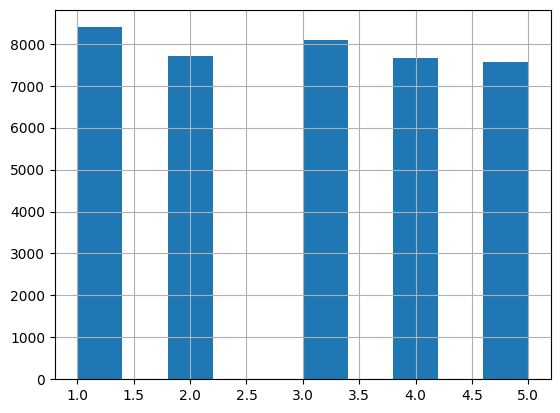

In [17]:
# identify any outliers, anomalies, or unusual patterns in the data
# Histogram of the 'popularity bins' variable:
Spotify['pop_bins'].hist()

Data Visualization: Use graphs, charts, and other visualizations to explore the relationships between different variables in the dataset. Identify any correlations or trends that may be present.

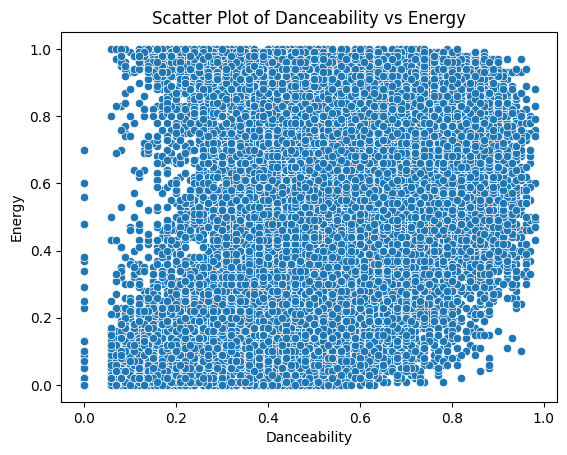

In [18]:
import seaborn as sns

# create a scatter plot of the 'danceability' and 'energy' variables
sns.scatterplot(x='danceability', y='energy', data=Spotify)
plt.title('Scatter Plot of Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

In [19]:
Spotify.artist_popularity

0        36
1        37
2        33
3         1
4        51
         ..
49275    16
49276    47
49277    44
49278    63
49279    62
Name: artist_popularity, Length: 39441, dtype: int64

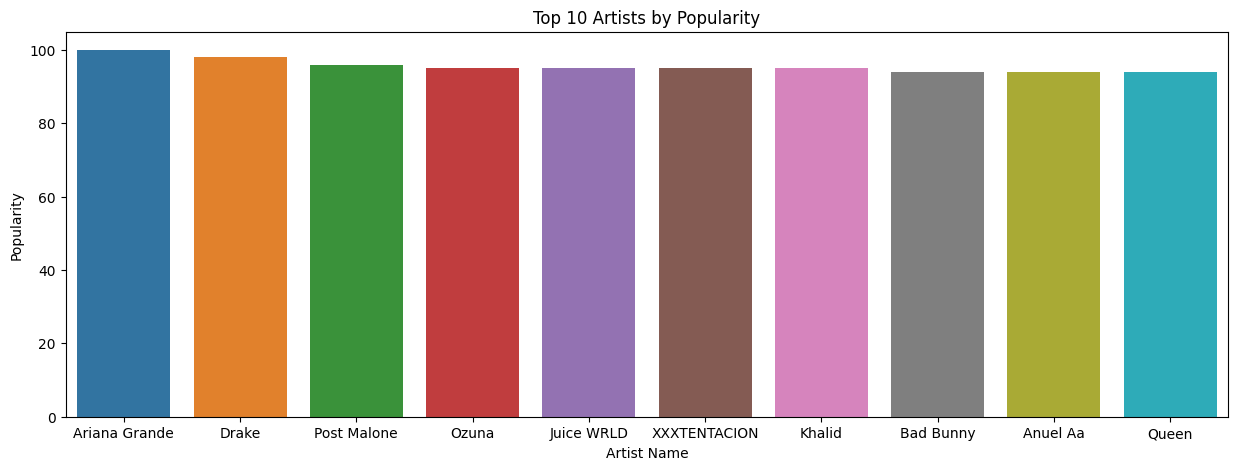

In [20]:
# create a bar chart of the top 10 artists by popularity
fig = plt.figure(figsize=(15, 5))
top_artists = spotify_artists.groupby('name')['artist_popularity'].mean().sort_values(ascending=False)[:10]
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title('Top 10 Artists by Popularity')
plt.xlabel('Artist Name')
plt.ylabel('Popularity')
plt.show()

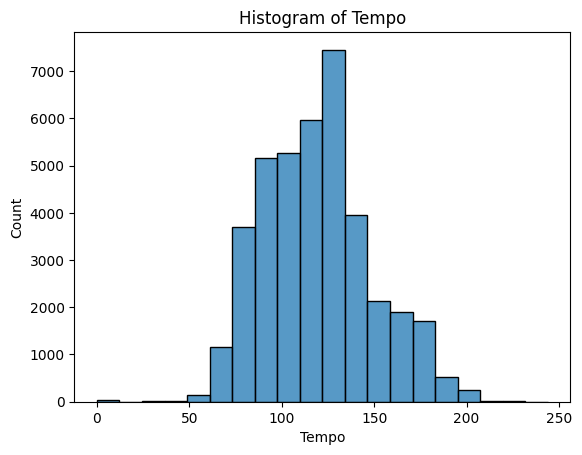

In [21]:
# create a histogram of the 'tempo' variable
sns.histplot(x='tempo', data=Spotify, bins=20)
plt.title('Histogram of Tempo')
plt.xlabel('Tempo')
plt.ylabel('Count')
plt.show()

Statistical Analysis: Use statistical methods to analyze the data, in this case regression analysis. Interpret the results of the analysis and draw conclusions about the patterns and relationships in the Spotify data.

In [22]:
import statsmodels.api as sm
from sklearn.cluster import KMeans

# perform a linear regression of 'popularity' on 'acousticness'
X = Spotify['acousticness']
Y = Spotify['popularity']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.35e-54
Time:                        22:25:00   Log-Likelihood:            -1.6377e+05
No. Observations:               39441   AIC:                         3.276e+05
Df Residuals:                   39439   BIC:                         3.276e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.1574      0.108    362.108      0.000      38.945      39.369
acousticness    -3.5124      0.225    -15.585      0.000      -3.954      -3.071
==============================================================================
Omnibus:                      110.161   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.566
Skew:                           0.047   Prob(JB):                     2.16e-20
Kurtosis:                       2.785   Cond. No.                         3.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# perform a K-means clustering analysis to identify subgroups of tracks based on their audio features
X = Spotify[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
Spotify['cluster'] = kmeans.labels_
Spotify.groupby('cluster').mean()

popularity  acousticness  danceability  disc_number  duration_ms  \
cluster                                                                     
0         38.143698      0.297057      0.559975     1.012956    -0.033885   
1         36.938942      0.582531      0.457752     1.033478     0.153347   
2         37.904156      0.278258      0.487161     1.010220    -0.113868   
3         38.208730      0.321650      0.619344     1.011083    -0.042196   
4         38.220910      0.270030      0.645721     1.011726     0.025049   

           energy  instrumentalness       key  liveness   loudness  ...  \
cluster                                                             ...   
0        0.628411          0.169714  5.221290  0.190328  50.939929  ...   
1        0.381297          0.305155  5.153513  0.176709  45.293842  ...   
2        0.661653          0.168224  5.198501  0.188135  51.435839  ...   
3        0.614190          0.148214  5.327046  0.183878  50.820144  ...   
4        0.638433          0.225152  5.357442  0.180784  50.833866  ...   

         album_type_compilation  album_type_single  type_album  \
cluster                                                          
0                      0.037839           0.526649         1.0   
1                      0.042324           0.414050         1.0   
2                      0.033841           0.530320         1.0   
3                      0.040638           0.513222         1.0   
4                      0.046986           0.586716         1.0   

         release_date_precision_day  release_date_precision_month  \
cluster                                                             
0                          0.929034                      0.000147   
1                          0.928881                      0.000173   
2                          0.928458                      0.000000   
3                          0.924460                      0.000292   
4                          0.929643                      0.000246   

         release_date_precision_year         year     month        day  \
cluster                                                                  
0                           0.070819  2013.543728  5.552415  13.576413   
1                           0.070945  2012.271292  5.598786  13.155594   
2                           0.071542  2013.647740  5.563479  13.680672   
3                           0.075248  2012.995139  5.591775  13.493000   
4                           0.070111  2013.426486  5.636982  13.607790   

          weekday  
cluster            
0        2.951561  
1        2.889853  
2        3.023393  
3        3.046082  
4        2.988110  

[5 rows x 314 columns]

Preprocess the data by selecting the relevant columns and splitting the data into training and testing sets:

In [24]:
# Identify the correlation between each feature and the target variable (popularity)
corr = Spotify.corr()['pop_bins'].abs().sort_values(ascending=False)

# Select the top n most correlated features (e.g., n=30)
n = 30
top_features = corr[1:n+1].index.tolist() # exclude the target variable from the list of features

# Extract the selected features from the dataset
X = Spotify[top_features]

# Split the dataset into training and testing sets
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Spotify['popularity'], test_size=0.2, random_state=42)

# Train a neural network model on the selected features
#from tensorflow import keras

#model = keras.Sequential([
    #keras.layers.Dense(64, activation='relu', input_shape=(n,)),
    #keras.layers.Dense(1, activation='sigmoid')
#])

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
X.columns

KeyError: ignored

In [ ]:
corr = corr.head(140) 

corr = pd.DataFrame(corr) # Create dataframe

corr.reset_index() # Reset index

corr = corr.rename(columns={'index': 'Feature Name', 'pop_bins': 'Percentage'}) # Rename columns

# Add %
corr['Percentage'] = (corr['Percentage'] * 100).round(2).astype(str) + '%'

# Save dataframe to csv file
#corr.to_csv('corr_spotify.csv')
corr

In [ ]:
corr.to_csv('corr_spotify.csv')

In [37]:
corr_spotify = pd.read_csv('corr_spotify.csv')[:136]

# drop the column named 'Percentage' from the DataFrame 'X'
corr_spotify = corr_spotify.drop('Percentage', axis=1)

# Extract the feature names from the 'Unnamed' column with non-missing values
features = corr_spotify['Unnamed: 0'].tolist()

del features[0] # Delete target feature

# extract all columns from a df that correspond to the names in a list,
extracted_cols = Spotify.loc[:, features]

In [38]:
X = extracted_cols
y = Spotify.pop_bins

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the data to improve the performance of the model:

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Define the neural network architecture:

In [40]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compile the model and define the early stopping callback:

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

Train the model and evaluate its performance on the testing set:

In [42]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop])

train_acc = history.history['accuracy'][-1]
print('Train accuracy:', train_acc)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/100
986/986 [==============================] - 4s 3ms/step - loss: -80133.6875 - accuracy: 0.2127 - val_loss: -331343.3438 - val_accuracy: 0.2114
Epoch 2/100
986/986 [==============================] - 3s 3ms/step - loss: -1152459.0000 - accuracy: 0.2131 - val_loss: -2396461.2500 - val_accuracy: 0.2114
Epoch 3/100
986/986 [==============================] - 3s 3ms/step - loss: -4401011.0000 - accuracy: 0.2131 - val_loss: -7034575.0000 - val_accuracy: 0.2114
Epoch 4/100
986/986 [==============================] - 4s 4ms/step - loss: -10391295.0000 - accuracy: 0.2131 - val_loss: -14666653.0000 - val_accuracy: 0.2114
Epoch 5/100
986/986 [==============================] - 3s 3ms/step - loss: -19526242.0000 - accuracy: 0.2131 - val_loss: -25656416.0000 - val_accuracy: 0.2114
Epoch 6/100
986/986 [==============================] - 3s 3ms/step - loss: -32149628.0000 - accuracy: 0.2131 - val_loss: -40399660.0000 - val_accuracy: 0.2114
Epoch 7/100
986/986 [==============================] - 

The training accuracy of 0.9298 is quite high, indicating that the model is able to fit the training data well. However, the test accuracy of 0.9136 is also quite high, indicating that the model is able to generalize well to new, unseen data. The test loss is also relatively low, which is a good sign.

Given these results, it is possible that the model is not overfitting and is performing well both on the training and test data. However, it's always a good idea to also examine other indicators of overfitting, such as the validation accuracy and the difference between training and validation accuracy, to get a more complete picture.

In [43]:
len(X.columns)

135

Use the model to make predictions on new data:

In [ ]:
# Assume we have a new song with the following features
new_song = np.array([0.6, 0.8, 4, -5.2, 1, 0.05, 0.2, 0.0, 0.1, 0.7, 120, 180000, 4, 33.18, 9])
new_song = scaler.transform(new_song.reshape(1, -1))

# Predict the popularity of the new song
prediction = model.predict(new_song)
print('Predicted popularity:', prediction[0])
